In [1]:
import cefcon as cf
import matplotlib.pyplot as plt
import matplotlib
import scanpy as sc
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["figure.figsize"] = [6, 4.5]

In [3]:
adata = sc.read("../../h5ad/v3_allGenes_myeloid_unintegrated_annotated.h5ad")
adata

AnnData object with n_obs × n_vars = 382320 × 32914
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'GEM', 'prog', 'disease', 'sex', 'pair', 'age', 'edss', 'disease.state', 'prog_sex', 'disease_sex', 'disease.state_sex', 'unintegrated_clusters', 'seurat_clusters', 'disease.patient', 'celltypes', 'celltypes.disease', 'celltypes.disease.state'
    var: 'vf_vst_counts.1_mean', 'vf_vst_counts.1_variance', 'vf_vst_counts.1_variance.expected', 'vf_vst_counts.1_variance.standardized', 'vf_vst_counts.1_variable', 'vf_vst_counts.1_rank', 'vf_vst_counts.2_mean', 'vf_vst_counts.2_variance', 'vf_vst_counts.2_variance.expected', 'vf_vst_counts.2_variance.standardized', 'vf_vst_counts.2_variable', 'vf_vst_counts.2_rank', 'vf_vst_counts.3_mean', 'vf_vst_counts.3_variance', 'vf_vst_counts.3_variance.expected', 'vf_vst_counts.3_variance.standardized', 'vf_vst_counts.3_variable', 'vf_vst_counts.3_rank', 'vf_vst_counts.4_mean', 'vf_vst_counts.4_variance', 'vf_vst_counts.4_variance.expected', 'vf_vst

In [4]:
adata.obs['celltypes']

GEM1_AAACCCAAGACCGCCT-1        Classical
GEM1_AAACCCAAGAGTGGCT-1        Classical
GEM1_AAACCCAAGTATCCTG-1        Classical
GEM1_AAACCCAAGTGAGGTC-1     Nonclassical
GEM1_AAACCCACAACGCATT-1        Classical
                                ...     
GEM30_TTTGGTTTCACCCTTG-1    Nonclassical
GEM30_TTTGGTTTCCGATTAG-1       Classical
GEM30_TTTGGTTTCGTTCAGA-1       Classical
GEM30_TTTGTTGAGCTCTTCC-1       Classical
GEM30_TTTGTTGTCCGGTAGC-1       Classical
Name: celltypes, Length: 382320, dtype: category
Categories (4, object): ['Classical', 'Nonclassical', 'Intermediate', 'mo-DC']

In [38]:
adata.obs['prog']

GEM1_AAACCCAAGACCGCCT-1             HC
GEM1_AAACCCAAGAGTGGCT-1             HC
GEM1_AAACCCAAGTATCCTG-1             HC
GEM1_AAACCCAAGTGAGGTC-1             HC
GEM1_AAACCCACAACGCATT-1             HC
                               ...    
GEM30_TTTGGTTTCACCCTTG-1    progressor
GEM30_TTTGGTTTCCGATTAG-1    progressor
GEM30_TTTGGTTTCGTTCAGA-1    progressor
GEM30_TTTGTTGAGCTCTTCC-1    progressor
GEM30_TTTGTTGTCCGGTAGC-1    progressor
Name: prog, Length: 382320, dtype: category
Categories (4, object): ['HC', 'RR', 'non-progressor', 'progressor']

In [84]:
# Define the disease states you want to include
disease_states_to_include = ['mo-DC']  # Replace with your specific disease states

# Subset the AnnData object based on the disease state metadata
subset_adata = adata[adata.obs['celltypes'].isin(disease_states_to_include)]
# Define the disease states you want to include
disease_states_to_include = ['RR']  # Replace with your specific disease states

# Subset the AnnData object based on the disease state metadata
subset_adata = subset_adata[subset_adata.obs['prog'].isin(disease_states_to_include)]
n_cells_downsample = 5000
if subset_adata.shape[0] > n_cells_downsample:
    # Let's dowmsample into 30K cells
    sc.pp.subsample(subset_adata, n_obs=n_cells_downsample, random_state=123)

# Log transformation
sc.pp.log1p(subset_adata)
subset_adata.layers['log_transformed'] = subset_adata.X.copy()


# Select the top 3,000 highly variable genes
sc.pp.highly_variable_genes(subset_adata, n_top_genes=3000)
subset_adata = subset_adata[:, subset_adata.var.highly_variable]
sc.pp.normalize_total(subset_adata, target_sum=1e4) # renormalize after filtering
#sc.pp.scale(adata, max_value=10)
sc.tl.pca(subset_adata)
sc.pp.neighbors(subset_adata, n_neighbors=10, n_pcs=35)
sc.tl.leiden(subset_adata, resolution=0.7)
# Use force-directed graph drawing
sc.tl.draw_graph(subset_adata)
subset_adata.write_h5ad("../../h5ad/v3_3KHVGs_mo-DC_RR_subset_cefcon.h5ad")

In [89]:
# Load the preprocessed data
subset_adata = sc.read("../../h5ad/v3_3KHVGs_mo-DC_RR_subset_cefcon.h5ad")
subset_adata

AnnData object with n_obs × n_vars = 3389 × 3000
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'GEM', 'prog', 'disease', 'sex', 'pair', 'age', 'edss', 'disease.state', 'prog_sex', 'disease_sex', 'disease.state_sex', 'unintegrated_clusters', 'seurat_clusters', 'disease.patient', 'celltypes', 'celltypes.disease', 'celltypes.disease.state', 'leiden'
    var: 'vf_vst_counts.1_mean', 'vf_vst_counts.1_variance', 'vf_vst_counts.1_variance.expected', 'vf_vst_counts.1_variance.standardized', 'vf_vst_counts.1_variable', 'vf_vst_counts.1_rank', 'vf_vst_counts.2_mean', 'vf_vst_counts.2_variance', 'vf_vst_counts.2_variance.expected', 'vf_vst_counts.2_variance.standardized', 'vf_vst_counts.2_variable', 'vf_vst_counts.2_rank', 'vf_vst_counts.3_mean', 'vf_vst_counts.3_variance', 'vf_vst_counts.3_variance.expected', 'vf_vst_counts.3_variance.standardized', 'vf_vst_counts.3_variable', 'vf_vst_counts.3_rank', 'vf_vst_counts.4_mean', 'vf_vst_counts.4_variance', 'vf_vst_counts.4_variance.expected', 

In [86]:
subset_adata.obs["celltypes"]

GEM14_AAACCCAAGTTCCGGC-1    mo-DC
GEM14_AAACGAAGTAGCGTCC-1    mo-DC
GEM14_AAAGAACGTAGATCGG-1    mo-DC
GEM14_AAAGAACGTTGTAGCT-1    mo-DC
GEM14_AAAGGATAGTACTGTC-1    mo-DC
                            ...  
GEM5_TTTGACTGTGTACGCC-1     mo-DC
GEM5_TTTGACTTCCATTTAC-1     mo-DC
GEM5_TTTGGTTGTTAAGACA-1     mo-DC
GEM5_TTTGTTGAGCAAGGAA-1     mo-DC
GEM5_TTTGTTGCACTAACCA-1     mo-DC
Name: celltypes, Length: 3389, dtype: category
Categories (1, object): ['mo-DC']

In [90]:
import numpy as np
data_matrix = subset_adata.X

# Convert the data matrix to float
data_matrix_float = data_matrix.astype(np.float32)
subset_adata.X = data_matrix_float

In [88]:
# prior_network = cf.datasets.load_human_prior_interaction_network(dataset='nichenet')
# Convert the gene symbols of the prior gene interaction network to the mouse gene symbols
# prior_network = cf.datasets.convert_human_to_mouse_network(prior_network)

In [101]:
prior_network = 'network_human.csv'

In [102]:
data = cf.data_preparation(subset_adata, prior_network)

[0] - Data loading and preprocessing...
Consider the input data with 1 lineages:
  Lineage - all:
    214 extra edges (Spearman correlation > 0.6) are added to the prior gene interaction network.
    Total number of edges: 102736.
    n_genes × n_cells = 2420 × 3389


In [104]:
CUDA = '0'

In [103]:
data

{'all': AnnData object with n_obs × n_vars = 3389 × 2420
     var: 'is_TF'
     uns: 'name', 'edgelist'
     varm: 'centrality_prior_net', 'idx_GeneName_map'}

In [106]:
%%time
cefcon_results_dict = {}
for li, data_li in data.items():
    # We suggest setting up multiple repeats to minimize the randomness of the computation.
    cefcon_GRN_model = cf.NetModel(epochs=350, repeats=3, cuda=CUDA, seed=-1)
    cefcon_GRN_model.run(data_li)

    cefcon_results = cefcon_GRN_model.get_cefcon_results(edge_threshold_avgDegree=8)
    cefcon_results_dict[li] = cefcon_results

[1] - Constructing cell-lineage-specific GRN...
  Lineage - all: 


  Iter: 3/3: 100%|████████████████| 350/350 [01:20<00:00,  4.37it/s, loss=0.00112, min_loss=7.53e-5]


CPU times: user 4min 1s, sys: 420 ms, total: 4min 1s
Wall time: 4min


In [107]:
%%time
for li, result_li in cefcon_results_dict.items():
    print(f'Lineage - {li}:')
    result_li.gene_influence_score()
    result_li.driver_regulators()

Lineage - all:
[2] - Identifying driver regulators...
  Solving MFVS problem...
    120 critical nodes are found.
    6 nodes left after graph reduction operation.
    Solving the Integer Linear Programming problem on the reduced graph...
      Solving by GUROBI...(optimal value with GUROBI:3.0,  status:optimal)
  123 MFVS driver nodes are found.
  Solving MDS problem...
    35 critical nodes are found.
    752 nodes left after graph reduction operation.
    Solving the Integer Linear Programming problem on the reduced graph...
      Solving by GUROBI...(optimal value with GUROBI:162.0,  status:optimal)
  197 MDS driver genes are found.
CPU times: user 405 ms, sys: 28 ms, total: 433 ms
Wall time: 434 ms


In [108]:
%%time
for li, result_li in cefcon_results_dict.items():
    print(f'Lineage - {li}:')
    result_li.RGM_activity()

Lineage - all:
[3] - Identifying regulon-like gene modules...
Done!
CPU times: user 431 ms, sys: 3.22 s, total: 3.65 s
Wall time: 7.27 s


In [109]:
# Check the names of lineages
print(list(data.keys()))

['all']


In [110]:
lineage = 'all'
result = cefcon_results_dict[lineage]

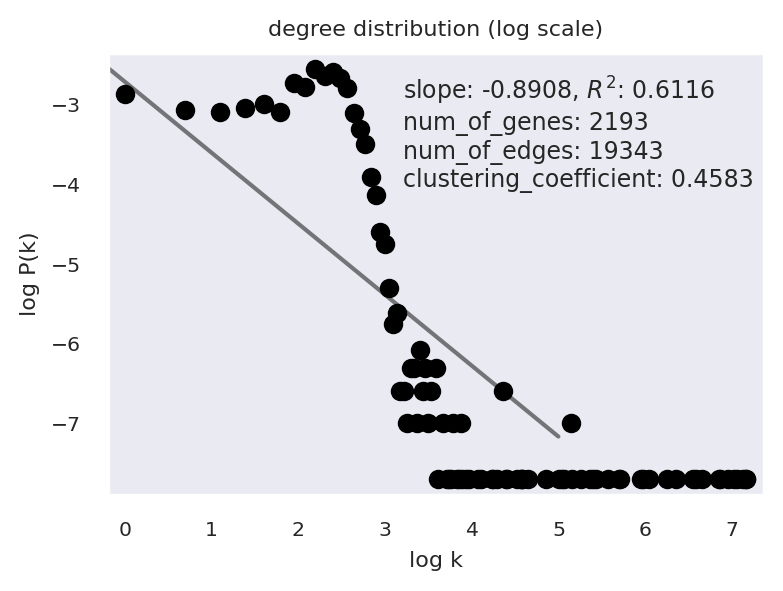

In [117]:
result.plot_network_degree_distribution()

In [112]:
# result.plot_gene_embedding_with_clustering(n_neighbors=30, resolution=1)

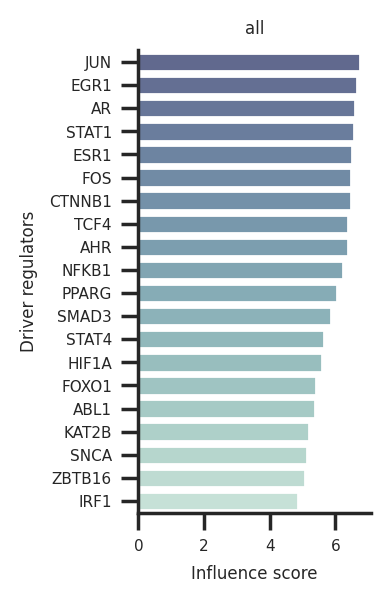

In [118]:
result.plot_influence_score()

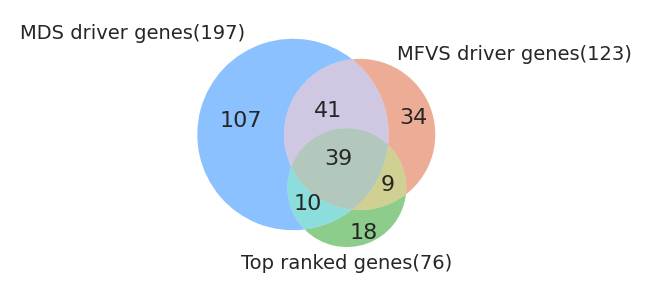

In [114]:
result.plot_driver_genes_Venn()

<Figure size 600x450 with 0 Axes>

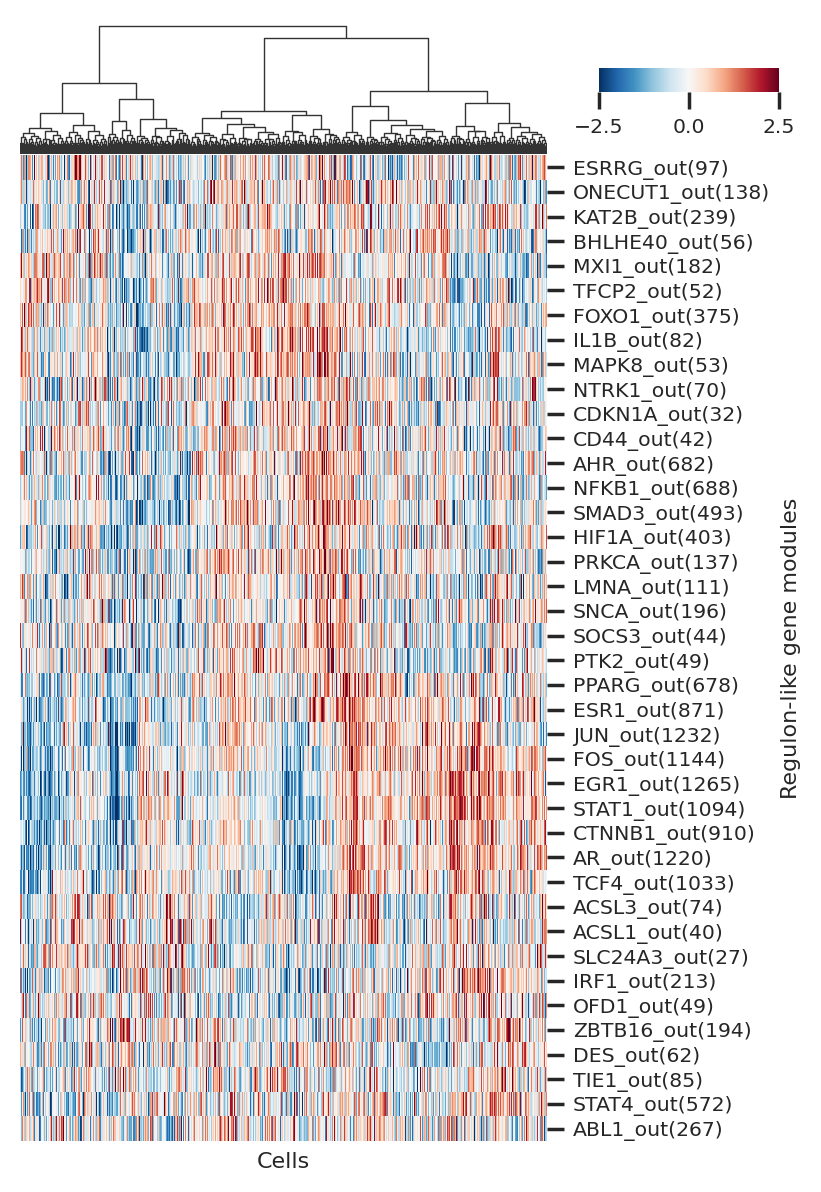

In [115]:
# adata_lineage = subset_adata[subset_adata.obs_names[subset_adata.obs[result.name].notna()],:]

result.plot_RGM_activity_heatmap(type='out')

# plt.savefig("classical_prog_vs_RR_classical.pdf", dpi=300)


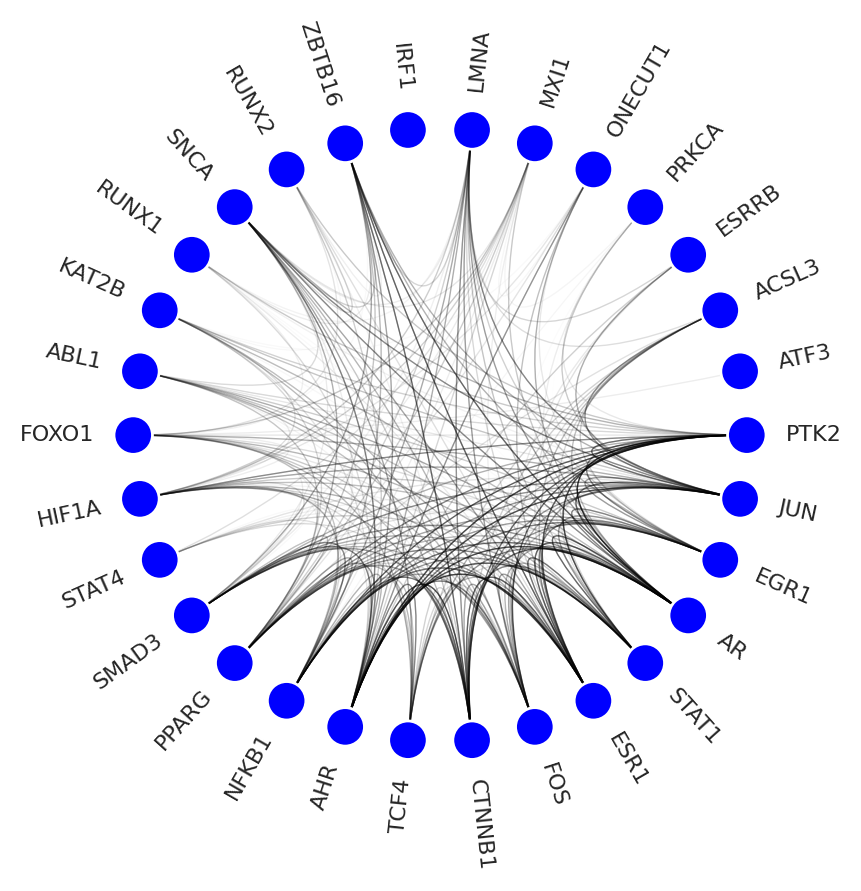

In [116]:
genes = result.driver_regulator.index[0:30]

network = result.plot_network(genes)

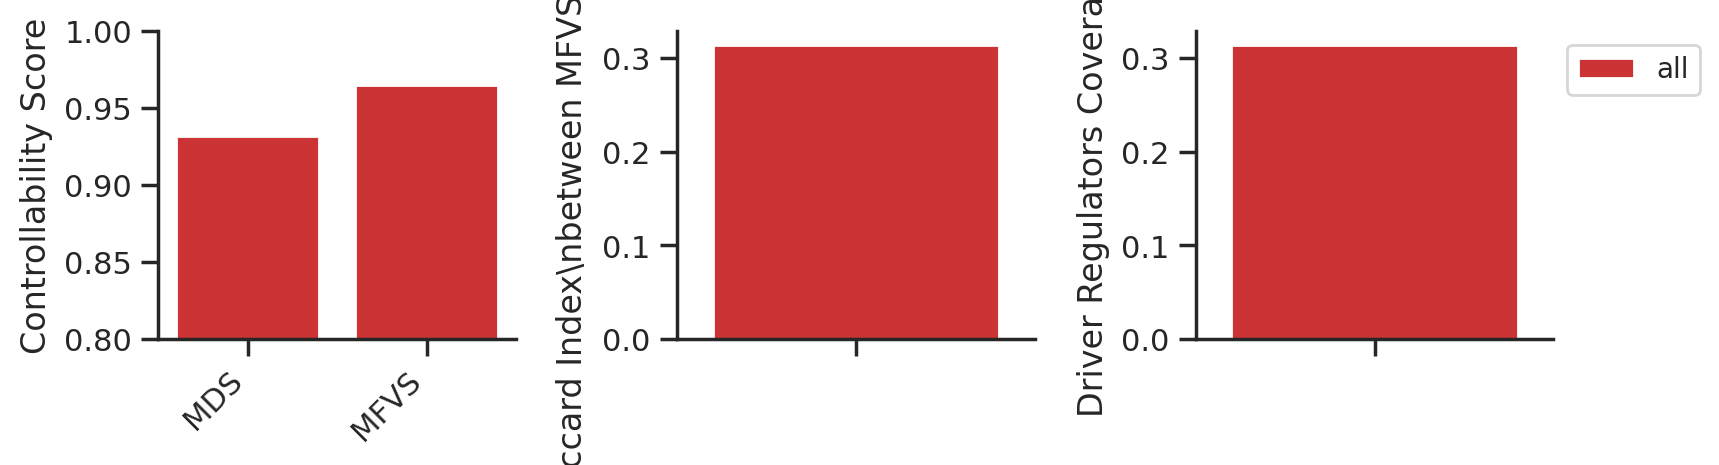

In [23]:
cf.utils.plot_controllability_metrics(cefcon_results_dict, return_value=False)
